In [1]:
# %load_ext autoreload
# %autoreload 2

## Brightness and LIME image explainer

In [7]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

from astroExplain.image.neighbors import Neighbors
from astroExplain.image.explanation import TellMeWhy
from sdss.utils.managefiles import FileDirectory

%matplotlib inline

In [2]:
data = "/home/edgar/xai-astronomy/data/images"
# load data
image = plt.imread(f"{data}/weird.jpg")/255.

In [3]:
def segment(image, sigma, compactness, nsegments):
 
    slic_parameters = {'sigma': sigma, 'compactness': compactness}

    nghs = Neighbors(
        image=image,
        number_segments=nsegments,
        slic_parameters=slic_parameters,
        random_seed=0
    )

    image_with_boundaries = mark_boundaries(
        nghs.image, nghs.segments,
        color=(1, 1, 1),
        outline_color=(1, 1, 1),
    )

    plt.clf()
    plt.imshow(image_with_boundaries)
    plt.axis("off")
    plt.tight_layout()

    save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
    fname = f"segments_{nsegments}_sigma_{sigma}_compactness_{compactness}"
    plt.savefig(f"{save_to}/{fname}.pdf")
    plt.savefig(f"{save_to}/{fname}.png")

    return image_with_boundaries, nghs

## Different segmentations

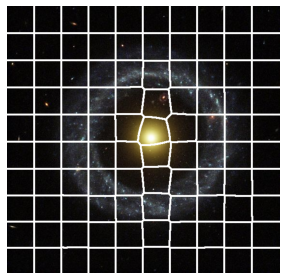

In [50]:
image_with_boundaries, nghs = segment(image, sigma=16, compactness=100, nsegments=100)

In [41]:
# perturbations = nghs.get_neighbors(10, None)

In [6]:
# for idx, perturbation in enumerate(perturbations):
    
    # plt.clf()

    # ngh_with_boundaries = mark_boundaries(
    #     perturbation, nghs.segments,
    #     color=(1, 1, 1),
    #     outline_color=(1, 1, 1),
    # )

    # plt.axis('off')

    # plt.imshow(ngh_with_boundaries)

    # plt.tight_layout()
    
    # save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
    
    # fname = f"neighbor_{idx}_segments_{100}_sigma_{16}_compactness_{10}"
    # plt.savefig(f"{save_to}/{fname}.pdf")
    # plt.savefig(f"{save_to}/{fname}.png")


# Explanations

Get heat map of explanation


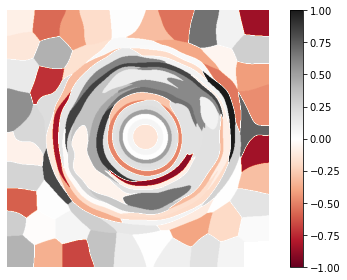

In [52]:
explanation_directory = "/home/edgar/xai-astronomy/data/images/weird/"
explanation_file = "weird_hide_none_base_mean_100_compactness_1"

with open(f"{explanation_directory}/{explanation_file}.pkl", "rb") as file:

    explainer = pickle.load(file)
    why = TellMeWhy(explainer)

weights_map = why.get_heatmap()
weights_map *= 1/np.nanmax(np.abs(weights_map))
plt.clf()
plt.imshow(weights_map, cmap="RdGy", vmin=-1, vmax=1)
plt.colorbar()
plt.axis('off')
plt.tight_layout()

save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
plt.savefig(f"{save_to}/{explanation_file}.pdf")
plt.savefig(f"{save_to}/{explanation_file}.png")


In [27]:
np.nanmin(weights_map)

-1.2557092411462971

6.374304581398369

In [33]:
image.mean()

0.07877351149133477